In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('ushape.csv')

In [4]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


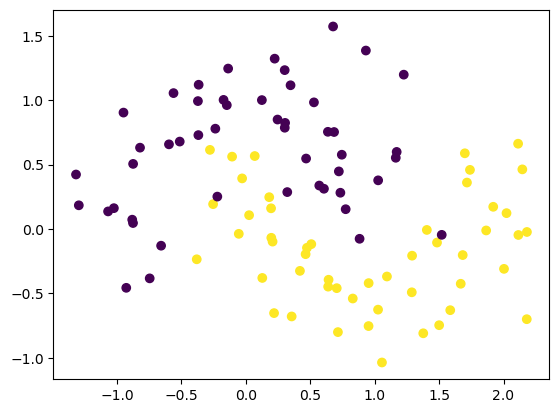

In [5]:
plt.scatter(df['3.159499363321345566e-02'],df['9.869877579082642072e-01'],c=df['0.000000000000000000e+00'])

In [6]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [7]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [8]:
model = Sequential()

model.add(Dense(10,activation='tanh',input_dim=2))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

C:\Users\ritik\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.get_weights()

[array([[-0.33219287, -0.35432282,  0.01381236, -0.14496642, -0.4648165 ,
         -0.63281083,  0.07913053,  0.19186187,  0.3911988 , -0.04612195],
        [-0.09941649, -0.20657551,  0.18318504,  0.591062  , -0.50404394,
          0.63242   ,  0.26070082, -0.58055276,  0.68192977,  0.10448712]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.3110708 , -0.5328253 , -0.10085604, -0.08825752, -0.5358171 ,
         -0.48458612, -0.08288503, -0.41532594, -0.09117573,  0.30098462],
        [ 0.4306075 ,  0.00685203, -0.53181195,  0.41999924,  0.2849459 ,
          0.4539262 ,  0.12675399, -0.21520686,  0.53865147,  0.14199746],
        [ 0.19539374, -0.36070925,  0.17931181, -0.16540024, -0.4170015 ,
         -0.303941  ,  0.27758288,  0.39162904,  0.14575297, -0.09205329],
        [-0.39732528,  0.35275817, -0.5226386 ,  0.17687702, -0.18570498,
          0.38067043,  0.26889753, -0.17130396,  0.19260561, -0.09953228],
        [ 0.03292

In [10]:
initial_weights = model.get_weights()

In [11]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [12]:
model.set_weights(initial_weights)

In [13]:
model.get_weights()

[array([[-0.26638585,  0.23868488, -0.7623844 , -0.48942104,  0.62123734,
         -0.2971119 ,  0.55122805, -0.6518805 , -1.4743731 , -0.25836444],
        [ 1.3479385 , -0.11530358,  0.04806873, -0.09367261,  0.06948281,
         -0.8488546 , -0.1498268 , -1.347296  , -1.1412357 ,  0.37136763]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-3.81923229e-01, -4.75177109e-01, -1.45745859e-01,
         -5.21204174e-02,  2.17968524e-01,  1.44580945e-01,
         -8.53074491e-02, -1.73042595e-01, -8.71419907e-02,
          5.85009754e-01],
        [ 4.81945366e-01, -3.23258638e-02, -2.45312303e-01,
          3.45638245e-01, -1.13281101e-01, -2.38442302e-01,
         -2.70832956e-01, -3.13596845e-01,  3.01901698e-01,
         -1.03347665e-02],
        [-3.91012013e-01, -1.23649612e-01, -9.99908224e-02,
          3.47791225e-01,  6.52462244e-01, -2.53115952e-01,
          8.47305283e-02, -2.46209770e-01,  1.99492812e-01,
         -3.2925981

In [14]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - accuracy: 0.1721 - loss: 0.8627 - val_accuracy: 0.2000 - val_loss: 0.9031
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.1721 - loss: 0.8567 - val_accuracy: 0.2000 - val_loss: 0.8707
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.1589 - loss: 0.8238 - val_accuracy: 0.2000 - val_loss: 0.8410
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.1731 - loss: 0.8078 - val_accuracy: 0.1500 - val_loss: 0.8122
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2287 - loss: 0.7791 - val_accuracy: 0.1500 - val_loss: 0.7854
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2335 - loss: 0.7647 - val_accuracy: 0.1500 - val_loss: 0.7606
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.2633 - loss: 0.7392 - val_accuracy: 0.2000 - val_loss: 0.7376
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2940 - loss: 0.7209 - val_accuracy: 0.4000 - val_loss

In [16]:
model.get_weights()

[array([[-0.32561785,  0.2913948 , -0.69010735, -0.40918493,  0.7638551 ,
         -0.31882545,  0.5104162 , -0.64596725, -1.4564879 , -0.2943706 ],
        [ 1.3232708 , -0.21411788,  0.04242974, -0.08755679,  0.07788252,
         -0.8986164 , -0.31391346, -1.324941  , -1.1412597 ,  0.45347577]],
       dtype=float32),
 array([ 0.03601878, -0.04491836, -0.01462687,  0.01177796,  0.00246904,
         0.05463535, -0.03355256,  0.1230241 ,  0.13522395,  0.02073987],
       dtype=float32),
 array([[-0.5218476 , -0.43487296,  0.0076681 , -0.03689347,  0.15697515,
          0.01023989, -0.23657335, -0.3135373 , -0.21180834,  0.5457606 ],
        [ 0.6342576 , -0.04978504, -0.38932496,  0.39487442, -0.04519512,
         -0.10110579, -0.13736257, -0.18185933,  0.4286007 ,  0.03063123],
        [-0.4806397 , -0.08196556, -0.05701498,  0.33584994,  0.5829858 ,
         -0.31011385,  0.05009757, -0.30509773,  0.14211339, -0.37965223],
        [ 0.6156802 , -0.21077617,  0.11425404, -0.23566401, 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 7s 693us/step


<Axes: >

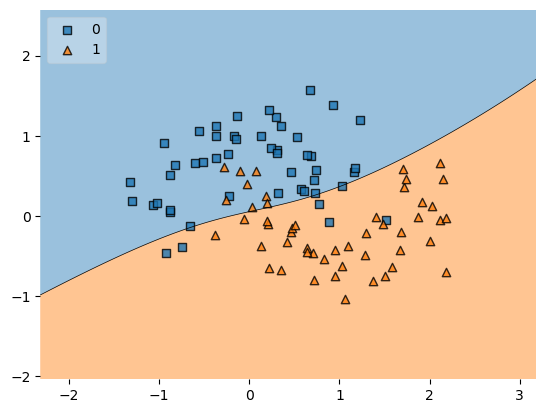

In [17]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [18]:
(np.random.randn(10,10)*0.01).min()

-0.019843131682874188

In [19]:
(np.random.randn(10,10)*0.01).max()

0.022830068745961142